In [72]:
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt
%matplotlib inline 


In [73]:
df = yf.download(
    "TCS.NS",
    start = "2011-12-31",
    end = "2025-3-6",
    progress = False
)

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2012-01-02,452.293823,455.114414,442.469700,445.539742,2248542
2012-01-03,459.584900,464.305104,452.830822,454.078026,2708884
2012-01-04,450.144653,462.424814,448.724778,462.386448,2386770
2012-01-05,449.760925,454.749741,447.976455,450.067948,2547312
2012-01-06,448.763092,456.035230,443.927789,447.458316,2119728
...,...,...,...,...,...
2025-02-27,3612.550049,3638.000000,3600.699951,3611.699951,3823856
2025-02-28,3483.250000,3600.000000,3457.000000,3584.949951,7085018


<Axes: xlabel='Date'>

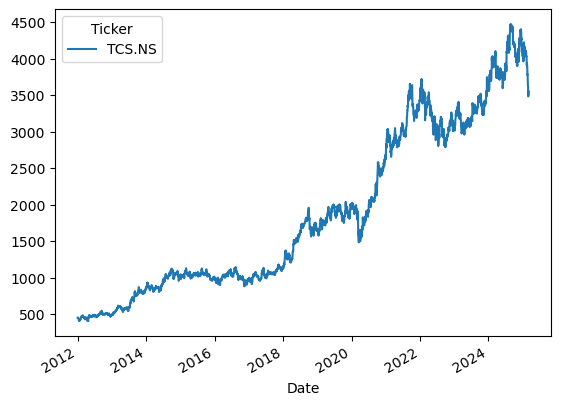

In [75]:
display(df)

df.Close.plot()

In [76]:
df_recent = yf.download(
    "TCS.NS",
    start = "2024-3-5",
    end = "2025-3-6",
    progress = False
)

<h2> Opening Vs Closing Price of Stock for Past One Year</h2>

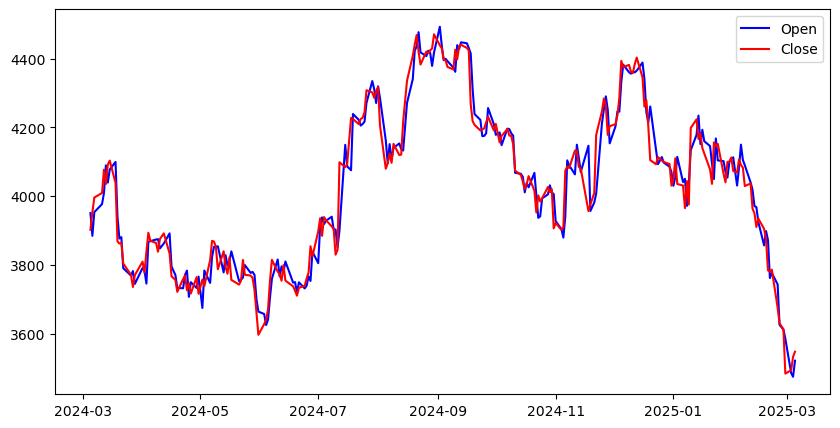

In [77]:
open = df_recent['Open']
close=df_recent['Close']
plt.figure(figsize=(10, 5))
plt.plot(open, label="Open", color="blue")  # First line
plt.plot(close, label="Close", color="red") 
plt.legend()

<h2> High Vs Low Price of Stock for Past One Year</h2>

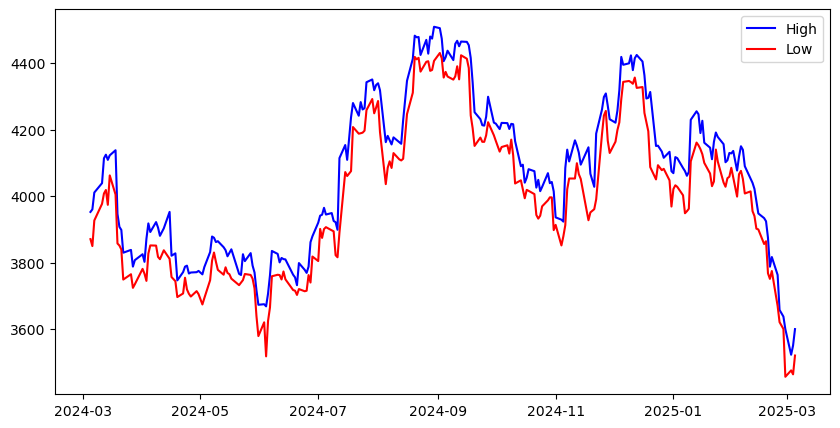

In [78]:
open = df_recent['High']
close=df_recent['Low']
plt.figure(figsize=(10, 5))
plt.plot(open, label="High", color="blue")  # First line
plt.plot(close, label="Low", color="red") 
plt.legend()

In [79]:
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["SMA_200"] = df["Close"].rolling(window=200).mean()

<h2>Calculating Simple Moving Average for Past 50 Day(Green) vs 200 Day(red)</h2>

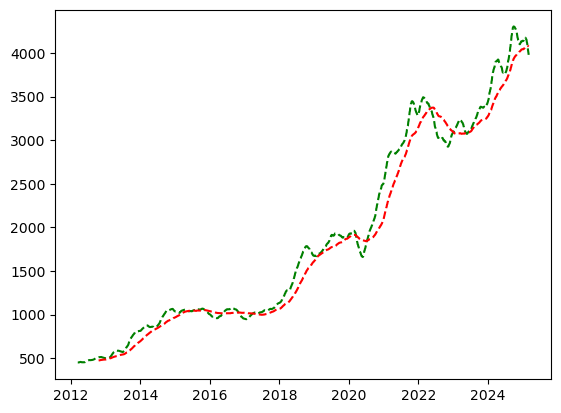

In [93]:
# plt.plot(df["Close"], label="Close Price", color="blue")
plt.plot(df["SMA_50"], label="50 day average", color="green", linestyle="dashed")
plt.plot(df["SMA_200"], label="200 day average", color="red", linestyle="dashed")